In [29]:
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import matrix

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from wordcloud import WordCloud




In [30]:
# Load the dataset
file_path = "IMDB Dataset.csv"
df = pd.read_csv(file_path)


In [31]:
# Define English stopwords manually
stopwords_set = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this",
    "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with",
    "about", "against", "between", "into", "through", "during", "before", "after", "above",
    "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
    "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "only", "own", "same",
    "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])


In [32]:
# Display dataset info
print(df.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [33]:
# Display dataset info
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     4998 non-null   object
 1   sentiment  4998 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB
None


In [34]:
# Detect Correct Column Names
print("\n🔹 Column Names:", df.columns)


🔹 Column Names: Index(['review', 'sentiment'], dtype='object')


In [35]:
df['sentiment'].value_counts()

sentiment
positive    2499
negative    2499
Name: count, dtype: int64

# Preprocessing of data

In [37]:
# Text Preprocessing Function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = text.split()  # Tokenization (simple split instead of word_tokenize)
    tokens = [word for word in tokens if word not in stopwords_set]  # Stopword removal
    return ' '.join(tokens)


In [38]:
# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [39]:
# Encode sentiment labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [40]:
# Print Preprocessed Data
print("\n🔹 Sample of Cleaned Text Data:")
print(df[['review']].head())



🔹 Sample of Cleaned Text Data:
                                              review
0  One of the other reviewers has mentioned that ...
1  A wonderful little production. <br /><br />The...
2  I thought this was a wonderful way to spend ti...
3  Basically there's a family where a little boy ...
4  Petter Mattei's "Love in the Time of Money" is...


In [41]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment'], test_size=0.2, random_state=42)


In [42]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Model Training


In [43]:
# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [44]:
# Predictions
y_pred = lr_model.predict(X_test_tfidf)


# Outcomes


In [45]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 88.20%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       524
           1       0.87      0.88      0.88       476

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [46]:
# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       524
           1       0.87      0.88      0.88       476

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



In [47]:
f1 = f1_score(y_test, y_pred)  # Calculate F1 Score


In [48]:
print(f"F1 Score: {f1:.2f}\n")


F1 Score: 0.88



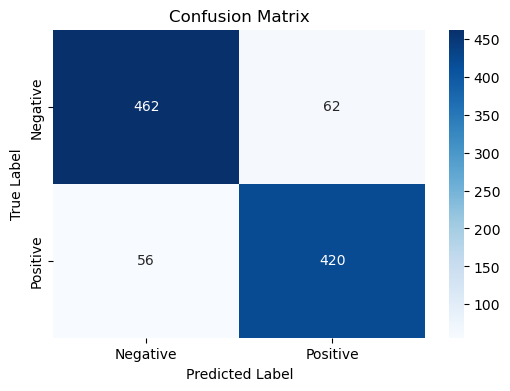

In [49]:
# Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

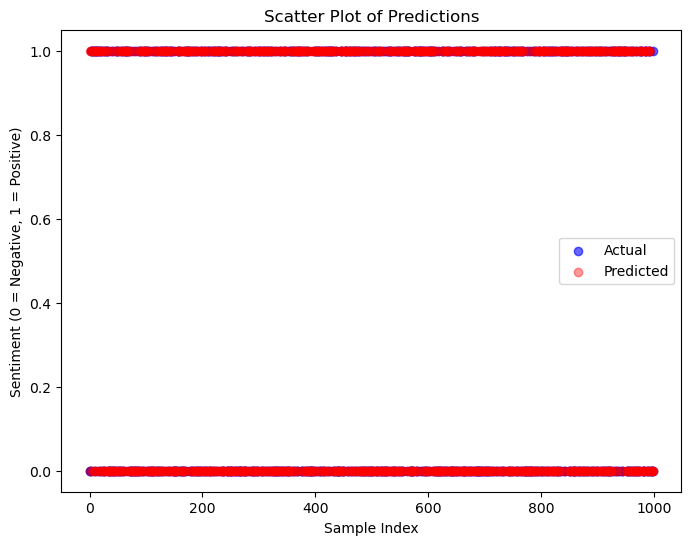

In [50]:
# Scatter Plot of Predictions
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label="Predicted", alpha=0.4)
plt.xlabel('Sample Index')
plt.ylabel('Sentiment (0 = Negative, 1 = Positive)')
plt.legend()
plt.title('Scatter Plot of Predictions')
plt.show()

In [51]:
# Get Feature Importance from Logistic Regression
feature_names = vectorizer.get_feature_names_out()
feature_importance = np.abs(lr_model.coef_).flatten()


In [52]:
# Sort top 20 features
sorted_indices = np.argsort(feature_importance)[::-1][:20]
top_features = [feature_names[i] for i in sorted_indices]
top_importance = feature_importance[sorted_indices]


C:\Users\DELL\AppData\Local\Temp\ipykernel_17976\2331171224.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance, y=top_features, palette="viridis")


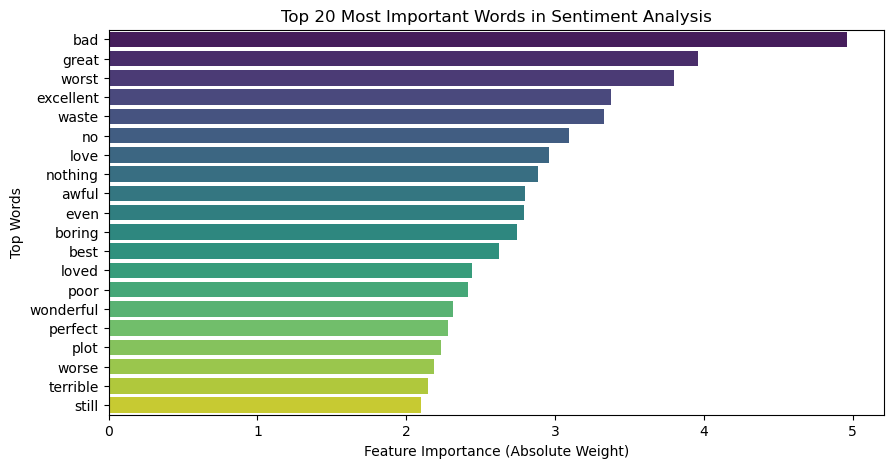

In [53]:
# Plot Top 20 Features
plt.figure(figsize=(10, 5))
sns.barplot(x=top_importance, y=top_features, palette="viridis")
plt.xlabel("Feature Importance (Absolute Weight)")
plt.ylabel("Top Words")
plt.title("Top 20 Most Important Words in Sentiment Analysis")
plt.show()

In [54]:
# Generate Word Clouds for Positive and Negative Reviews
positive_text = " ".join(df[df['sentiment'] == 1]['cleaned_review'])
negative_text = " ".join(df[df['sentiment'] == 0]['cleaned_review'])


In [55]:
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_text)


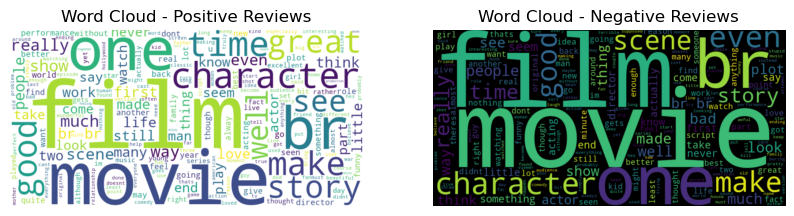

In [56]:
# Plot Word Clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews")

plt.show()

In [59]:
# Function to predict sentiment of new reviews
def predict_sentiment(review_text):
    processed_text = preprocess_text(review_text)  # Preprocess input text
    text_tfidf = vectorizer.transform([processed_text])  # Convert to TF-IDF
    prediction = lr_model.predict(text_tfidf)[0]  # Predict sentiment
    return "Positive" if prediction == 1 else "Negative"


In [60]:
# Example Predictions
sample_reviews = [
    "This movie was absolutely fantastic! The story was engaging and the acting was superb.",
    "I hated this movie. It was a complete waste of time, with terrible acting and a boring plot.",
    "An average film, some good moments but overall quite forgettable.",
    "Amazing cinematography, but the storyline was weak and predictable.",
    "I loved every second of it! Highly recommend to everyone."
]

In [61]:
# Predict Sentiment
for review in sample_reviews:
    print(f"Review: {review}\nPredicted Sentiment: {predict_sentiment(review)}\n")


Review: This movie was absolutely fantastic! The story was engaging and the acting was superb.
Predicted Sentiment: Positive

Review: I hated this movie. It was a complete waste of time, with terrible acting and a boring plot.
Predicted Sentiment: Negative

Review: An average film, some good moments but overall quite forgettable.
Predicted Sentiment: Positive

Review: Amazing cinematography, but the storyline was weak and predictable.
Predicted Sentiment: Negative

Review: I loved every second of it! Highly recommend to everyone.
Predicted Sentiment: Positive



In [62]:
import joblib
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

# Save Model
joblib.dump(log_reg_model, "logistic_regression_sentiment.pkl")

print("Logistic Regression model saved successfully!")


ValueError: could not convert string to float: 'remember wooden undramatic literary adaptations worst see broadly acted unintentionally hilarious piece chocolatebox adaptation culpable catherine zj undeniably easy eye substitutes swishing big dress looking sultry actually turning performance played pofaced like melodrama cold comfort farm without jokes effort not helped scriptwriter tin ear dialogue misses entirely novels sense irony tragedy shame given quality acting talent offer joan plowright claire skinner steven macintosh deserve better'